# Car Price Analysis using EDA



## Step 1: Project Overview

We have a car sales dataset with details like Make, Model, Year, Engine Size, Mileage, Fuel Type, Transmission, and Price.

**Aim:**  
To understand **how the car's price changes** based on different factors such as:
- Car age (Year)
- Mileage driven
- Engine size
- Fuel type
- Transmission type
- Brand/Model differences

We will analyze these columns and see **how each one affects the price**.


## Step 2: Data Import & Setup


#### **Import necessary libraries and Load the dataset**

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
df=pd.read_csv("car_sales_modified.csv")

#### basic information

In [140]:
# We make a copy of the original dataset so that we do not change the original data while cleaning.
data=df.copy()

In [141]:
data.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model D,2009.0,2.7,80212.0,Electric,Manual,26886.030522
1,Ford,Model D,2016.0,4.0,93738.0,Electric,Manual,29864.975211
2,Ford,Model A,2017.0,4.3,183167.0,Diesel,Automatic,23258.815853
3,BMW,Model E,2014.0,1.9,135734.0,Petrol,Manual,20386.905111
4,Audi,Model C,NaN,1.6,182500.0,Diesel,Manual,19658.649290


In [142]:
data.shape

(7400, 8)

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          7359 non-null   object 
 1   Model         7363 non-null   object 
 2   Year          7365 non-null   float64
 3   Engine Size   7368 non-null   float64
 4   Mileage       7351 non-null   float64
 5   Fuel Type     7363 non-null   object 
 6   Transmission  7371 non-null   object 
 7   Price         7360 non-null   float64
dtypes: float64(4), object(4)
memory usage: 462.6+ KB


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7400 entries, 0 to 7399
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          7359 non-null   object 
 1   Model         7363 non-null   object 
 2   Year          7365 non-null   float64
 3   Engine Size   7368 non-null   float64
 4   Mileage       7351 non-null   float64
 5   Fuel Type     7363 non-null   object 
 6   Transmission  7371 non-null   object 
 7   Price         7360 non-null   float64
dtypes: float64(4), object(4)
memory usage: 462.6+ KB


## Step 3: Dataset Exploration

In this step, we are going to understand how the data looks.
We will check:
- Total rows and columns
- Missing values
- Duplicate rows
- Data types
- Basic statistics of numeric columns
- Number of unique values in categorical columns


### Column Description
- **Make**: The brand of the car (for example: Toyota, Honda, Ford).
- **Model**: The specific version or name of the car under the brand.
- **Year**: The year in which the car was manufactured.
- **Engine Size**: The size of the car's engine (measured in liters).
- **Mileage**: The total distance the car has traveled (in kilometers).
- **Fuel Type**: The type of fuel the car uses (Petrol, Diesel, Electric).
- **Transmission**: Shows whether the car has Manual or Automatic gear system.
- **Price**: The selling price of the car.


In [145]:
# Check missing values in each column
data.isnull().sum()

Make            41
Model           37
Year            35
Engine Size     32
Mileage         49
Fuel Type       37
Transmission    29
Price           40
dtype: int64

In [146]:
# Check for duplicate rows
data.duplicated().sum()

np.int64(373)

In [147]:
# Check data types of each column
data.dtypes

Make             object
Model            object
Year            float64
Engine Size     float64
Mileage         float64
Fuel Type        object
Transmission     object
Price           float64
dtype: object

In [148]:
data.shape

(7400, 8)

In [149]:
# Summary statistics for numerical columns
data.describe()

,Year,Engine Size,Mileage,Price
count,7365.000000,7368.000000,7351.000000,7360.000000
mean,2010.576239,2.763246,99222.345531,24843.337132
std,6.329775,1.007750,57714.439463,5201.346689
min,2000.000000,1.000000,5.000000,8657.963423
25%,2005.000000,1.900000,49153.500000,21135.080570
50%,2011.000000,2.800000,99316.000000,24807.463753
75%,2016.000000,3.600000,149353.000000,28526.669477
max,2021.000000,4.500000,199987.000000,40739.892708


In [150]:
#  Summary statistics for numerical columns
data.describe(include="O")

,Make,Model,Fuel Type,Transmission
count,7359,7363,7363,7371
unique,5,5,3,2
top,Toyota,Model B,Petrol,Automatic
freq,1490,1520,2464,3687


In [151]:
# Unique values count for categorical columns
data[['Make', 'Model', 'Fuel Type', 'Transmission']].nunique()


Make            5
Model           5
Fuel Type       3
Transmission    2
dtype: int64

## From the dataset exploration:
#### observation
- The dataset contains 7400 rows and 8 columns.
- Some columns have missing values.
- There are a 373 duplicate rows present.
- Columns like Year, Engine Size, Mileage, and Price are **numerical**, while Make, Model, Fuel Type, and Transmission are **categorical**.
- There are 5 car brands, 5 models, 3 fuel types, and 2 transmission types in the dataset.

## Step 4: Data Cleaning


**Remove duplicate rows**

In [152]:
data = data.drop_duplicates()

**Fill missing values**

In [153]:
# Fill numeric columns with median
num_col=["Year",'Engine Size',"Mileage","Price"]
for  col in num_col:
    data[col]=data[col].fillna(data[col].median())

cat_col=["Make","Model","Fuel Type","Transmission"]
for col in cat_col:
    data[col]=data[col].fillna(data[col].mode()[0])

In [154]:
# creating new col car age to analysis who the price is effected by this 
data['Year'] = data['Year'].astype(int)
data['Car_Age'] = 2025-data['Year']


In [155]:
data['Mileage']=data['Mileage'].astype('int')

In [156]:
data['Price']=data['Price'].round(2)

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7027 entries, 0 to 7358
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          7027 non-null   object 
 1   Model         7027 non-null   object 
 2   Year          7027 non-null   int64  
 3   Engine Size   7027 non-null   float64
 4   Mileage       7027 non-null   int64  
 5   Fuel Type     7027 non-null   object 
 6   Transmission  7027 non-null   object 
 7   Price         7027 non-null   float64
 8   Car_Age       7027 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 549.0+ KB


In [158]:
data.isnull().sum()

Make            0
Model           0
Year            0
Engine Size     0
Mileage         0
Fuel Type       0
Transmission    0
Price           0
Car_Age         0
dtype: int64

In [159]:
data.duplicated().sum()

np.int64(5)

In [164]:
data[['Year','Car_Age','Price']].head(1)

,Year,Car_Age,Price
0,2009,16,26886.03


### Observation (Step 4)

- Duplicate rows were removed to avoid repeated data.
- Missing values in numeric columns were filled using the median.
- Missing values in categorical columns were filled using the mode.
- The Year column was converted to integer type.
- A new column "Car_Age" was added to understand how the age of the car affects its price.
- Mileage data type is changed to int.
- Rounded the price column because it more decimal points

## Step 5: Univariate Analysis and Visualization


In [62]:
# value count is used to find how many times each category appears in a categorical column.
cat_col=["Make","Model","Fuel Type","Transmission"]
for col in cat_col:
    print(f"column names is:{col}")
    print(data[col].value_counts(),"\n")

column names is:Make
Make
Toyota    1465
Honda     1395
Ford      1390
BMW       1387
Audi      1385
Name: count, dtype: int64 

column names is:Model
Model
Model B    1476
Model D    1408
Model E    1408
Model A    1392
Model C    1338
Name: count, dtype: int64 

column names is:Fuel Type
Fuel Type
Petrol      2359
Diesel      2337
Electric    2326
Name: count, dtype: int64 

column names is:Transmission
Transmission
Automatic    3519
Manual       3503
Name: count, dtype: int64 



In [67]:
# what is the max and min car price in any brand
print(f"Min car price is {data['Price'].min()}₹ \n Max car price is {data['Price'].min()}₹")


Min car price is 8657.96₹ 
 Max car price is 8657.96₹


In [71]:
# which car brand as appears more
data['Make'].value_counts().head(1)


Make
Toyota    1465
Name: count, dtype: int64

In [75]:
# What is the range of Mileage values(mileage means: Traveled KM)
print(f"{data['Mileage'].min()} to {data['Mileage'].max()} this the range of mileage")


5.0 to 199987.0 this the range of mileage


In [167]:
# Find the oldest cars based on Car_Age
#data[data['Car_Age'].idxmax()]
data[data['Car_Age'] == data['Car_Age'].max()].shape

(297, 9)

### Observation 

- Mileage values range from 5.0 km to 199987.0 km, showing both less used and highly used cars.
- Toyota is the most common brand in the dataset (appears 1465 times).
- The minimum car price is ₹8657.96 and the maximum car price is ₹8657.96 .
- The oldest car is found by checking the highest Car_Age value (296 old cars founded).
- value_counts() is used to see how many times each category appears in a column.


### Univariate Visualization

Text(0.5, 1.0, 'Price Distribution')

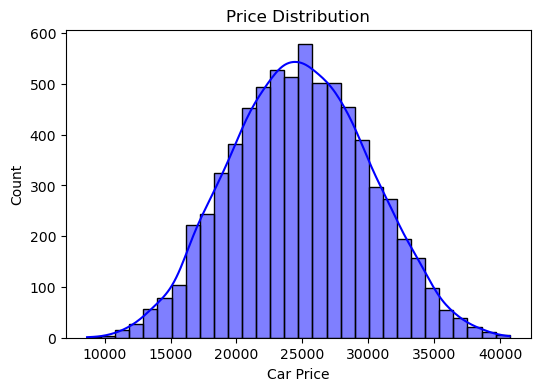

In [96]:
# what is the range of price
plt.figure(figsize=(6,4))
sns.histplot(data=data["Price"],bins=30,color="blue",kde=True)
plt.xlabel("Car Price")
plt.title("Price Distribution")

### Observation (Price Distribution)
- Most car prices are between 20,000 and 30,000.
- The distribution looks like a bell shape (normal distribution).
- Very few cars have very low or very high prices.

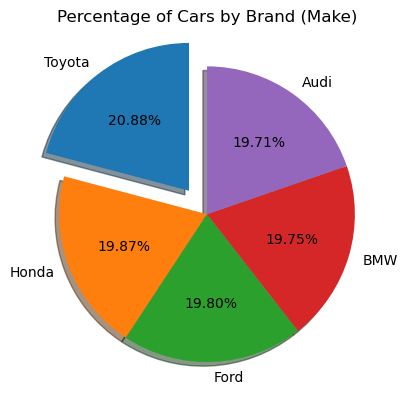

In [168]:
# What percentage of cars belong to each brand (Make) in the dataset
plt.pie(data['Make'].value_counts(),labels=data['Make'].value_counts().index,shadow=True,autopct='%0.2f%%',startangle=90,explode=(0.2,0,0,0,0))
plt.title("Percentage of Cars by Brand (Make)")
plt.show()


### Observation  (Brand Pie Chart)
- All car brands have almost equal share.
- Toyota has the highest share (20.86%).
- Honda, Ford, BMW, and Audi have very close percentages.


## Step 6: Bivariate Analysis and Visualization

In [42]:
# How does each numeric column change the Price

cols=['Year', 'Engine Size', 'Mileage', 'Price', 'Car_Age']
for col in cols:
    corr_value = data[[col, 'Price']].corr().iloc[0,1]
    print(f"Correlation between {col} and Price: {corr_value:.3f}")

Correlation between Year and Price: 0.617
Correlation between Engine Size and Price: 0.376
Correlation between Mileage and Price: -0.575
Correlation between Price and Price: 1.000
Correlation between Car_Age and Price: -0.617


In [31]:
# Do older cars have more KM?
print(f"The relation between Car_Age and Mileage: {data[['Car_Age','Mileage']].corr().iloc[0,1]:.3f}")
# the correlation is 0.018 it means there is no relation between them

The relation between Car_Age and Mileage: 0.018


In [33]:
# Do Automatic cars have higher mileage or Manual cars
data.groupby('Transmission')['Mileage'].mean().round(2)
# This means Manual cars are used more or travel longer distances on average.

Transmission
Automatic    98900.35
Manual       99548.38
Name: Mileage, dtype: float64

In [36]:
# Which brand has the highest average price
data.groupby('Make')['Price'].mean().round(2).sort_values(ascending=False)
# Honda has the highest average car price among all the brands in the dataset.

Make
Honda     24972.24
Ford      24852.75
Toyota    24820.68
BMW       24808.04
Audi      24763.33
Name: Price, dtype: float64

In [41]:
# Which Fuel Type cars travel more distance
data.groupby('Fuel Type')['Mileage'].mean().round(2).sort_values()
# Diesel cars travel more distance on average than Petrol and Electric cars.

Fuel Type
Electric     97834.64
Petrol       99520.06
Diesel      100305.43
Name: Mileage, dtype: float64

In [174]:
# Which car brand is sold more?
data['Make'].value_counts().idxmax()


'Toyota'

### Bivariate Summary 

- Diesel cars have the highest mileage.
- Manual cars have more mileage than Automatic cars.
- Car age and mileage have almost no strong link.
- Honda has the highest average car price.
- Newer cars and bigger engines cost more, while older cars and high mileage cars cost less.


### Bivariate Visualization

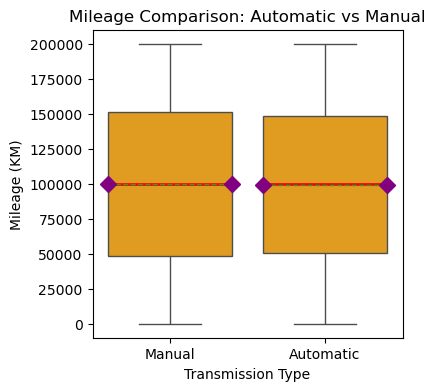

In [179]:
# Do Automatic cars have higher mileage or Manual cars
plt.figure(figsize=(4,4))
sns.boxplot(data,x=data['Transmission'],y=data['Mileage'],color='Orange',meanline=True,showmeans=True,
    meanprops=dict(marker='D', markerfacecolor='purple', markeredgecolor='purple', markersize=8),
            medianprops=dict(color='red', linewidth=2))
plt.title("Mileage Comparison: Automatic vs Manual")
plt.xlabel("Transmission Type")
plt.ylabel("Mileage (KM)")
plt.show()

### Observation
Both Manual and Automatic cars have almost the same mileage range.<br>
The median and mean mileage is also very similar for both types,So, mileage is almost the same for both Manual and Automatic cars. But if we see properly the manual cars are more traveled the automatic.



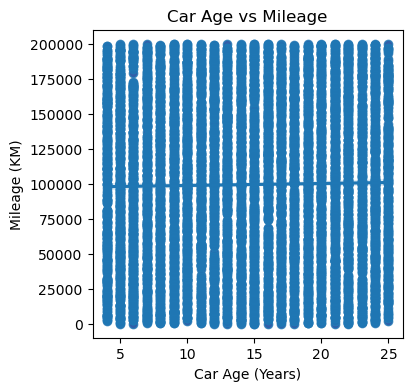

corelation: 0.02


In [178]:
# Do older cars have more KM?
plt.figure(figsize=(4,4))
sns.scatterplot( data=data,x=data['Car_Age'], y=data['Mileage'], color='purple')
sns.regplot(data=data,x=data['Car_Age'], y=data['Mileage'])

plt.title("Car Age vs Mileage")
plt.xlabel("Car Age (Years)")
plt.ylabel("Mileage (KM)")
plt.show()
print('corelation:',data[['Car_Age','Mileage']].corr().iloc[0,1].round(2))

### Observation:
The regression line is almost flat and the points are spread out evenly. <br>
The correlation value is 0.02, which is almost zero. <br>
So, mileage does not change clearly with car age. There is no clear relationship between them.


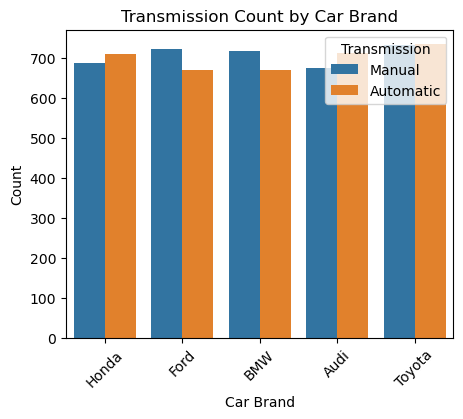

In [177]:
# Which transmission type is sold more across different car brands?
plt.figure(figsize=(5,4))
sns.countplot(data=data, x='Make', hue='Transmission')
plt.title("Transmission Count by Car Brand")
plt.xlabel("Car Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



#### Observation
Honda and Audi have slightly more Automatic cars, while Ford and BMW have slightly more Manual cars. <BR>
Toyota shows almost equal numbers of Manual and Automatic cars.

## Step 7: Multivariate Visualizations


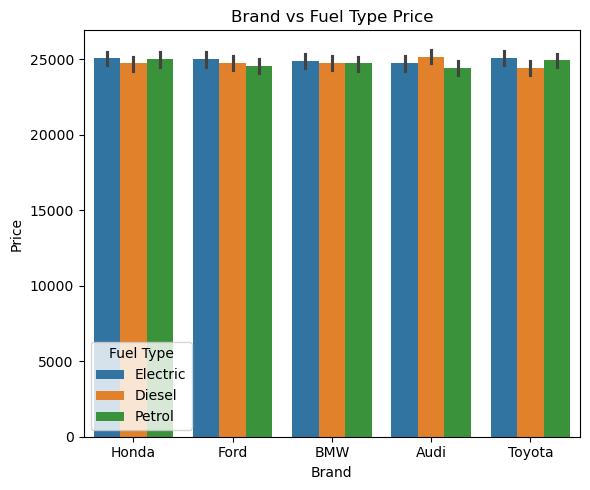

In [181]:
# Which fuel type cars are more expensive among different brands?
plt.figure(figsize=(6,5))

sns.barplot(data=data,x='Make',y='Price',hue='Fuel Type',estimator='mean')
plt.title("Brand vs Fuel Type Price")   
plt.xlabel("Brand")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

### Observation
Fuel type does not make a big difference in price across any brand. <br>
The price variation between Electric, Diesel, and Petrol cars is very small.<br>

- In Honda, Electric cars are slightly higher priced.
- In Ford, all fuel types have almost the same price.
- In BMW, Petrol cars are slightly higher than Diesel.
- In Audi, Electric cars are slightly higher priced.
- In Toyota, Diesel cars are slightly higher.

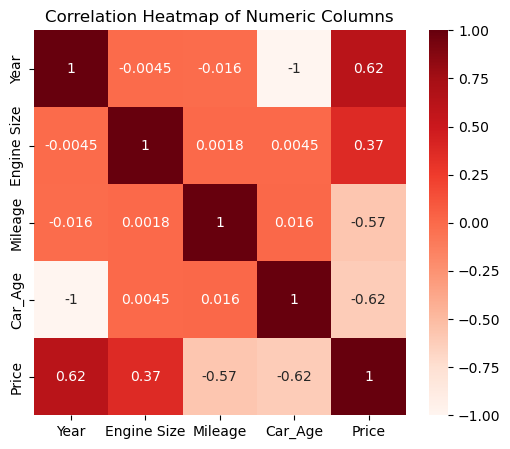

In [182]:
plt.figure(figsize=(6,5))
sns.heatmap(data[['Year','Engine Size','Mileage','Car_Age','Price']].corr(), annot=True, cmap='Reds')
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


### Observation
- Price has a strong positive correlation with Year (0.62), which means newer cars are more expensive.
- Price has a moderate positive correlation with Engine Size (0.38), so cars with bigger engines cost more.
- Price has a strong negative correlation with Mileage (-0.58), meaning cars with higher kilometers driven have lower prices.
- Price also has a strong negative correlation with Car_Age (-0.62), so older cars are cheaper.
- Year and Car_Age have a perfect negative correlation (-1) because Car_Age is directly calculated from Year.


## Step 8: Outlier Detection (Pandas + Visualizations)

In [109]:
num_cols = data.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_limit) | (data[col] > upper_limit)]
    print(f"\nColumn: {col}")
    print(f"Outliers count: {outliers.shape[0]}")



Column: Year
Outliers count: 0

Column: Engine Size
Outliers count: 0

Column: Mileage
Outliers count: 0

Column: Price
Outliers count: 7

Column: Car_Age
Outliers count: 0


### Observation
- There are 7 cars with unusual prices. 
- Their prices are either very high or very low compared to most cars. 
- So these are called outliers.


### Finding Outliers Using Box Plot (Price)

- Only the Price column has outliers. 
- No other numeric column shows noticeable outliers.


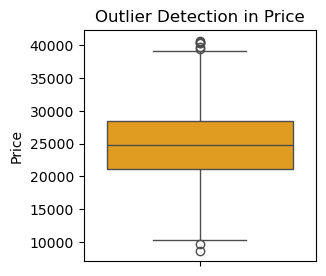

In [185]:
plt.figure(figsize=(3,3))
sns.boxplot(y=data['Price'], color='orange')
plt.title("Outlier Detection in Price")
plt.ylabel("Price")
plt.show()


## Step 9: Final Conclusion

In this project, we analyzed the car sales dataset using Pandas, Matplotlib, and Seaborn.

### Key Findings:
- Newer cars and cars with larger engine size have higher prices.
- Older cars and cars with higher mileage have lower prices.
- Diesel cars generally have higher mileage compared to Petrol and Electric cars.
- Manual transmission cars show slightly higher mileage than Automatic cars.
- Among different brands, Honda has the highest average car price.
- We found 7 outliers in the Price column, meaning some cars have unusually high or low prices.

### Conclusion:
Car price mainly depends on the **Year**, **Engine Size**, **Mileage**, and **Car Age**.  
Price increases when the car is newer and has a bigger engine, and decreases when the car is older or has traveled more distance.
